# Tutorial: Functions on LCAs

In [1]:
from abelian import Function, LCA, Homomorphism
import matplotlib.pyplot as plt
from IPython.display import display, Math
import math

def show(arg):
    return display(Math(arg.to_latex()))

## Initializing a new function

### With an analytical representation

If the representation of the function is given by an analytical expression, initialization is simple.

Below we define a gaussian function on $\mathbb{Z}$, and one on $T$.

In [2]:
def gaussian(vector_arg, k = 0.1):
    return math.exp(-sum(i**2 for i in vector_arg)*k)

gauss_on_Z = Function(gaussian, LCA([0]))
show(gauss_on_Z)
gauss_on_T = Function(gaussian, LCA([1], [False]))
show(gauss_on_T)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### With a table of values

Functions on $\mathbb{Z}_\mathbf{p}$ can be defined using a table of values, if $p_i \geq 1$ for every $p_i \in \mathbf{p}$.

In [3]:
table_data = [[1,2,3,4,5],
              [2,3,4,5,6],
              [3,4,5,6,7]]

domain = LCA([3, 5])

table_func = Function(table_data, domain)
show(table_func)

<IPython.core.display.Math object>

## Function evaluation

Functions can be evaluated on a point.

In [4]:
gauss_on_Z([0])

1.0

Or on an interval.

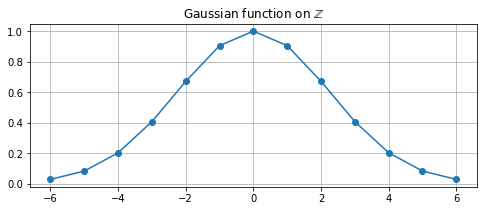

In [5]:
sample_points = list(range(-6, 7))
sampled_func = gauss_on_Z.sample(sample_points)

plt.figure(figsize = (8, 3))
plt.title('Gaussian function on $\mathbb{Z}$')
plt.plot(sample_points, sampled_func, '-o')
plt.grid(True)
plt.show()

## Shifts

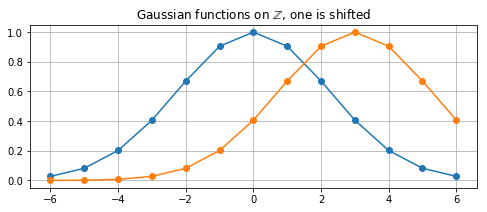

In [6]:
sample_points = list(range(-6, 7))
sampled_func1 = gauss_on_Z.sample(sample_points)
sampled_func2 = gauss_on_Z.shift([3]).sample(sample_points)

plt.figure(figsize = (8, 3))
plt.title('Gaussian functions on $\mathbb{Z}$, one is shifted')
plt.plot(sample_points, sampled_func1, '-o')
plt.plot(sample_points, sampled_func2, '-o')
plt.grid(True)
plt.show()

## Pullbacks

### Pullback on $\phi: \mathbb{Z} \to \mathbb{Z}_n$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

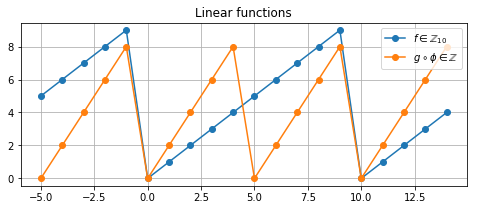

In [7]:
def linear(arg):
    return sum(arg)

# The original function
f = Function(linear, LCA([10]))
show(f)

# A homomorphism phi
phi = Homomorphism([2], target = [10])
show(phi)

# The pullback of f along phi
g = f.pullback(phi)
show(g)

# Sample the functions and plot them
sample_points = list(range(-5, 15))
f_sampled = f.sample(sample_points)
g_sampled = g.sample(sample_points)

plt.figure(figsize = (8, 3))
plt.title('Linear functions')
plt.plot(sample_points, f_sampled, '-o', label ='$f \in \mathbb{Z}_{10}$')
plt.plot(sample_points, g_sampled, '-o', label ='$g \circ \phi \in \mathbb{Z}$')
plt.grid(True)
plt.legend(loc = 'best')
plt.show()

## Pushforwards

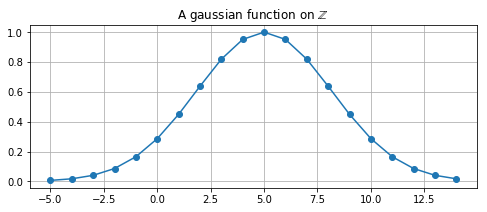

In [8]:
def gaussian(vector_arg, k = 0.05):
    return math.exp(-sum(i**2 for i in vector_arg)*k)

# Create gaussian on Z, shift it by 5
gauss_on_Z = Function(gaussian, LCA([0])).shift([5])

sample_points = list(range(-5, 15))
f_sampled = gauss_on_Z.sample(sample_points)

# Plot it
plt.figure(figsize = (8, 3))
plt.title('A gaussian function on $\mathbb{Z}$')
plt.plot(sample_points, f_sampled, '-o')
plt.grid(True)
plt.show()

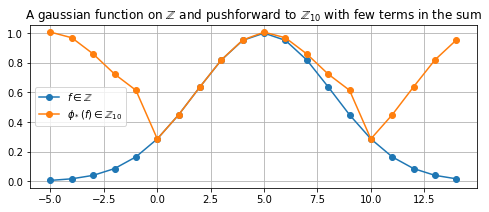

In [9]:
# Use a pushforward to periodize the function
phi = Homomorphism([1], target = [10])

# Does not go far enough out in the norm
def norm_condition(v):
    return sum(abs(i) for i in v) < 10

gauss_on_Z_10 = gauss_on_Z.pushforward(phi, norm_condition)


# Sample the functions and plot them
pushforward_sampled = gauss_on_Z_10.sample(sample_points)

plt.figure(figsize = (8, 3))
plt.title('A gaussian function on $\mathbb{Z}$ and pushforward to $\mathbb{Z}_{10}$ with few terms in the sum')
plt.plot(sample_points, f_sampled, '-o', label ='$f \in \mathbb{Z}$')
plt.plot(sample_points, pushforward_sampled, '-o', label ='$\phi_*(f) \in \mathbb{Z}_{10}$')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

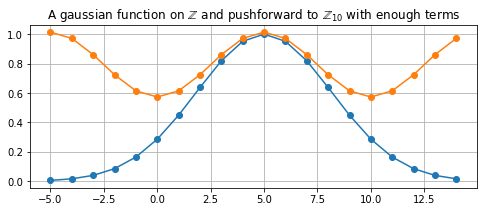

In [10]:
# Use a pushforward to periodize the function
phi = Homomorphism([1], target = [10])

# Does go far enough
def norm_condition(v):
    return sum(abs(i) for i in v) < 50

gauss_on_Z_10 = gauss_on_Z.pushforward(phi, norm_condition)


# Sample the functions and plot them
pushforward_sampled = gauss_on_Z_10.sample(sample_points)

plt.figure(figsize = (8, 3))
plt.title('A gaussian function on $\mathbb{Z}$ and pushforward to $\mathbb{Z}_{10}$ with enough terms')
plt.plot(sample_points, f_sampled, '-o', label ='$f \in \mathbb{Z}$')
plt.plot(sample_points, pushforward_sampled, '-o', label ='$\phi_*(f) \in \mathbb{Z}_{10}$')
plt.grid(True)
plt.show()